In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import cv2
from skimage import img_as_ubyte

# FILTERING 

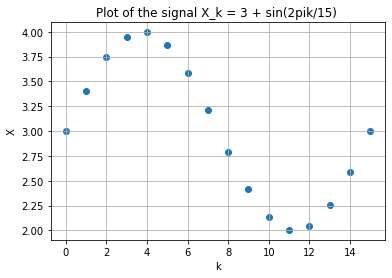

In [2]:
### Declaring the function on which the operation must be perfomed
X =  3 + np.sin( 2*np.pi* np.linspace(0,15,16) /15 )
a = np.linspace(0,15,16)

plt.scatter(a,X)
plt.title('Plot of the signal X_k = 3 + sin(2pik/15) ')
plt.ylabel('X')
plt.xlabel('k')
plt.grid()
plt.show()

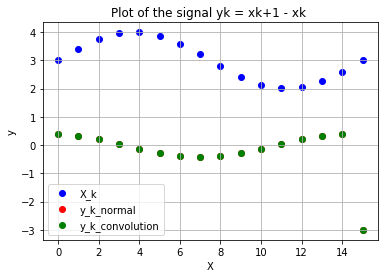

In [3]:
### a) yk = xk+1 - xk
Xk_1 = np.zeros(X.shape)

###### Calculating X_k+1 by shifting the signal to left by 1
Xk_1[:-1] = X[1:]

yk_a = Xk_1 - X

### convolution implementation

####### Declaring the filter
conv_filter = np.array([1,-1,0])
####### Padding the function with len(X) + len(filter) - 1
X_conv_padded = np.zeros(18)
X_conv_padded[1:-1] = X
yk_a_conv = np.zeros(X.shape)

for i in range(16) :
    ######### inverting the filter followed by multipling with the receptive field
    yk_a_conv[i] = np.sum(X_conv_padded[i:i+3]*conv_filter[::-1])

plt.scatter(a,X,label='X_k',c='b')
plt.scatter(a,yk_a,label = 'y_k_normal',c='r')
plt.scatter(a,yk_a_conv,label='y_k_convolution',c='g')
plt.title('Plot of the signal yk = xk+1 - xk ')
plt.ylabel('y')
plt.xlabel('X')
plt.legend()
plt.grid()
plt.show()

In the figure above, we can see that only blue and green points are visible whereas the red points arent. This is because the yk values obtained by normal computation and convolution coincide owing to which the green points completely coincide with the red points.

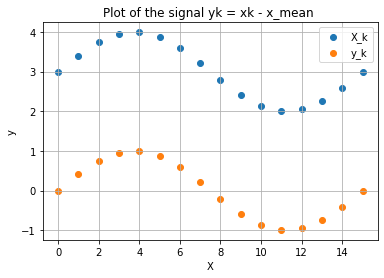

In [4]:
### b) yk = xk - x_mean. Not linear shift invariant. Hence, no convolution implementation

###### calculating the x_mean 
x_mean = np.sum(X)/16
###### Normal implementation
yk_b = X - x_mean

plt.scatter(a,X,label = 'X_k')
plt.scatter(a,yk_b,label = 'y_k')
plt.legend()
plt.title('Plot of the signal yk = xk - x_mean ')
plt.ylabel('y')
plt.xlabel('X')
plt.grid()
plt.show()

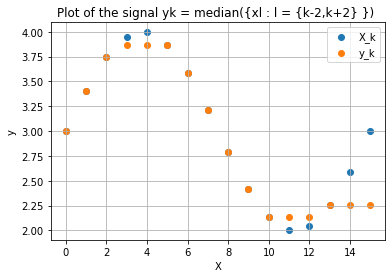

In [5]:
### c) yk = median({xl : l = {k-2,k+2} }). Not linear shift invariant. No convolution implementation

####### padding the signal with zeros to account for k-2 to k+2 receptive field
X_padded = np.zeros(20)
X_padded[2:-2] = X
y_k_c = np.zeros(X.shape)

for i in range(16) :
    ####### calculating the media over the 5 points
    y_k_c[i] = np.median(X_padded[i:i+5])

plt.scatter(a,X,label='X_k')
plt.scatter(a,y_k_c,label = 'y_k')
plt.title('Plot of the signal yk = median({xl : l = {k-2,k+2} }) ')
plt.ylabel('y')
plt.xlabel('X')
plt.legend()
plt.grid()
plt.show()

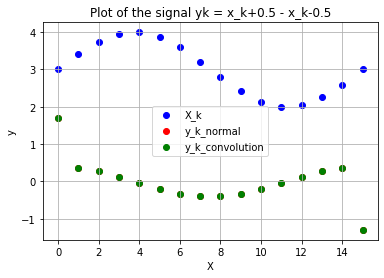

In [6]:
### d) yk = x_k+0.5 - x_k-0.5. Linear Shift Invariant

yk_d = np.zeros(X.shape)
####### padding with zeros to account for x[i+2]
X_padded = np.zeros(18)
X_padded[1:-1] = X

for i in range(16) :
    ####### Normal implementation
    ####### x_k+0.5 = (x_k+1 + x_k)/2
    ####### x_k-0.5 = (x_k + x_k-1)/2
    yk_d[i] = (X_padded[i+1] + X_padded[i+2])/2 - (X_padded[i]+X_padded[i+1])/2

####### from the equation above x_k = (x_k+1 - x_k-1)/2    
conv_filter = np.array([1/2,0,-1/2])
yk_d_conv = np.zeros(X.shape)
for i in range(16):
    yk_d_conv[i] = np.sum(X_padded[i:i+3]*conv_filter[::-1])

plt.scatter(a,X,label='X_k',c='b')
plt.scatter(a,yk_d,label='y_k_normal',c='r')
plt.scatter(a,yk_d_conv,label='y_k_convolution',c='g')
plt.title('Plot of the signal yk = x_k+0.5 - x_k-0.5')
plt.ylabel('y')
plt.xlabel('X')
plt.legend()
plt.grid()
plt.show()

In the figure above, we can see that only blue and green points are visible whereas the red points arent. This is because the yk values obtained by normal computation and convolution coincide owing to which the green points completely coincide with the red points.

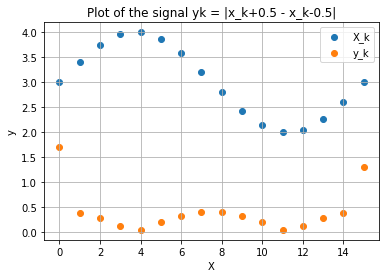

In [7]:
### e) yk = | x_k+0.5 - x_k-0.5 | Not a linear shift invariant operation. Hence, no convolution implementation

yk_e = np.zeros(X.shape)
X_padded = np.zeros(18)
X_padded[1:-1] = X

for i in range(16) :
    yk_e[i] = np.abs((X_padded[i+2])/2 - (X_padded[i])/2)

plt.scatter(a,X,label='X_k')
plt.scatter(a,yk_e,label='y_k')
plt.title('Plot of the signal yk = |x_k+0.5 - x_k-0.5|')
plt.ylabel('y')
plt.xlabel('X')
plt.legend()
plt.grid()
plt.show()

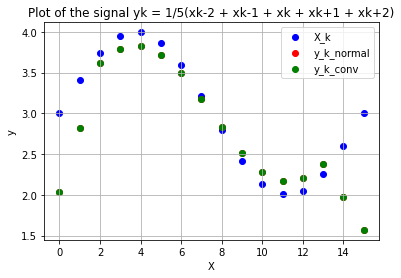

In [8]:
### f) yk = 1/5(xk-2 + xk-1 + xk + xk+1 + xk+2). Linear Shift invariant operation

yk_f = np.zeros(X.shape)

##### padding the signal with zeros to account for the x_k+2, x_k-2 and so on
X_padded = np.zeros(20)
X_padded[2:-2] = X

for i in range(16):
    ######## Normal implementation
    yk_f[i] = np.sum(X_padded[i:i+5])/5

######### filter declaration    
conv_filter = np.array([1/5,1/5,1/5,1/5,1/5]) 
yk_f_conv = np.zeros(X.shape)
for i in range(16) :
    yk_f_conv[i] = np.sum(X_padded[i:i+5]*conv_filter)
    
plt.scatter(a,X,label='X_k',c='b')
plt.scatter(a,yk_f,label='y_k_normal',c='r')
plt.scatter(a,yk_f_conv,label='y_k_conv',c='g')
plt.title('Plot of the signal yk = 1/5(xk-2 + xk-1 + xk + xk+1 + xk+2)')
plt.ylabel('y')
plt.xlabel('X')
plt.legend()
plt.grid()
plt.show()

In the figure above, we can see that only blue and green points are visible whereas the red points arent. This is because the yk values obtained by normal computation and convolution coincide owing to which the green points completely coincide with the red points.

# FILTERING IN FOURIER SPACE

/Users/hunter/DS_LAB/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


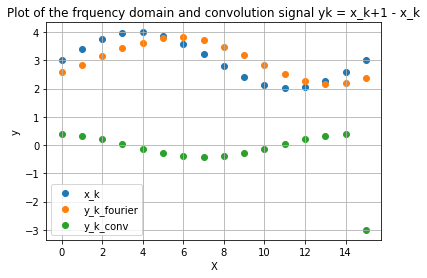

In [9]:
### a) yk = xk+1 - xk 
### Fourier domain implementation

######## calculating the 16 point FFT for signal and filter
X_a_fft = np.fft.fft(X,16)
conv_a_filter = np.array([1,-1,0])
conv_a_filter_fft = np.fft.fft(conv_filter,16)

######## calculating the output fft by multiplying the signal and filter ffts
yk_a_fft = X_a_fft*conv_a_filter_fft
####### calculating the ifft again to convert to spacial domain
yk_a_fourier = np.fft.ifft(yk_a_fft)

plt.scatter(a,X,label='x_k')
plt.scatter(a,yk_a_fourier,label = 'y_k_fourier')
plt.scatter(a,yk_a_conv,label='y_k_conv')
plt.title('Plot of the frquency domain and convolution signal yk = x_k+1 - x_k')
plt.ylabel('y')
plt.xlabel('X')
plt.grid()
plt.legend()
plt.show()

From the above, we can see that the yk obtained from convolution and fourier analysis vary. This is beacuse in the convolution, we have padded the signal and computed the convolution whereas in the fourier analysis, we did not consider the fact that the signal is padded.

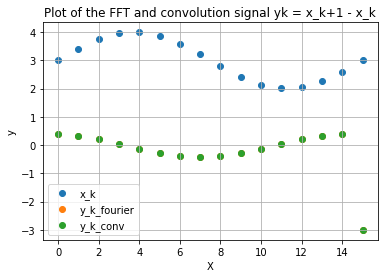

In [10]:
####### calculating the 18 point FFT i.e. padding the signal and filter to account for the circular convolutions
X =  3 + np.sin( 2*np.pi* np.linspace(0,15,16) /15 )
X_a_fft = np.fft.fft(X,18)
conv_a_filter = np.array([1,-1,0])
conv_a_filter_fft = np.fft.fft(conv_a_filter,18)

yk_a_fft = X_a_fft*conv_a_filter_fft
yk_a_fourier = np.fft.ifft(yk_a_fft,18)[1:-1]

plt.scatter(a,X,label='x_k')
plt.scatter(a,yk_a_fourier,label = 'y_k_fourier')
plt.scatter(a,yk_a_conv,label='y_k_conv')
plt.title('Plot of the FFT and convolution signal yk = x_k+1 - x_k')
plt.ylabel('y')
plt.xlabel('X')
plt.grid()
plt.legend()
plt.show()

From the above, we can see that the yk generated from both the fourier and convolution match each other.

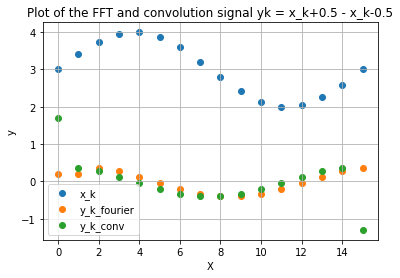

In [11]:
### d) yk = x_k+0.5 - x_k-0.5
### Fourier domain implementation

X_d_fft = np.fft.fft(X,16)
conv_d_filter = np.array([1/2,0,-1/2])
conv_d_filter_fft = np.fft.fft(conv_d_filter,16)

yk_d_fft = X_d_fft*conv_d_filter_fft
yk_d_fourier = np.fft.ifft(yk_d_fft)

plt.scatter(a,X,label='x_k')
plt.scatter(a,yk_d_fourier,label = 'y_k_fourier')
plt.scatter(a,yk_d_conv,label='y_k_conv')
plt.title('Plot of the FFT and convolution signal yk = x_k+0.5 - x_k-0.5')
plt.ylabel('y')
plt.xlabel('X')
plt.grid()
plt.legend()
plt.show()

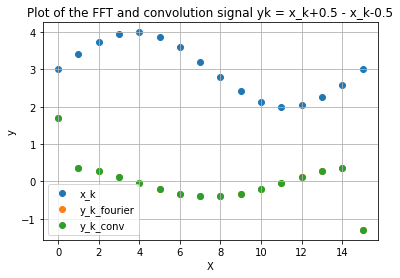

In [12]:
X_padded = np.zeros(18)
X_padded[1:-1] = X
X_d_fft = np.fft.fft(X,18)
conv_d_filter = np.array([1/2,0,-1/2])
conv_d_filter_fft = np.fft.fft(conv_d_filter,18)

yk_d_fft = X_d_fft*conv_d_filter_fft
yk_d_fourier = np.fft.ifft(yk_d_fft)[1:-1]

plt.scatter(a,X,label='x_k')
plt.scatter(a,yk_d_fourier,label = 'y_k_fourier')
plt.scatter(a,yk_d_conv,label='y_k_conv')
plt.title('Plot of the FFT and convolution signal yk = x_k+0.5 - x_k-0.5')
plt.ylabel('y')
plt.xlabel('X')
plt.grid()
plt.legend()
plt.show()

As expected, the results from both the frequency domain filtering and convolution match

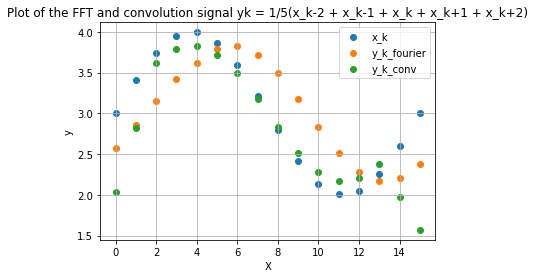

In [13]:
### f) yk = 1/5(x_k-2 + x_k-1 + x_k + x_k+1 + x_k+2)
### Fourier domain implementation

X_f_fft = np.fft.fft(X,16)
conv_f_filter = np.array([1/5,1/5,1/5,1/5,1/5])
conv_f_filter_fft = np.fft.fft(conv_f_filter,16)

yk_f_fft = X_f_fft*conv_f_filter_fft
yk_f_fourier = np.fft.ifft(yk_f_fft)

plt.scatter(a,X,label='x_k')
plt.scatter(a,yk_f_fourier,label = 'y_k_fourier')
plt.scatter(a,yk_f_conv,label='y_k_conv')
plt.title('Plot of the FFT and convolution signal yk = 1/5(x_k-2 + x_k-1 + x_k + x_k+1 + x_k+2)')
plt.ylabel('y')
plt.xlabel('X')
plt.grid()
plt.legend()
plt.show()

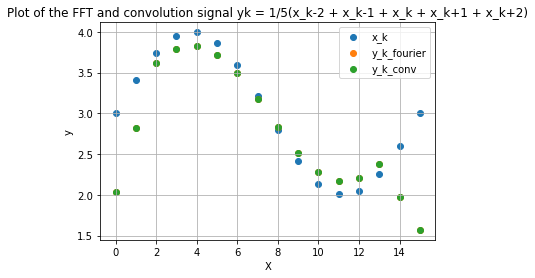

In [14]:
X_f_fft = np.fft.fft(X,20)
conv_f_filter = np.array([1/5,1/5,1/5,1/5,1/5])
conv_f_filter_fft = np.fft.fft(conv_f_filter,20)

yk_f_fft = X_f_fft*conv_f_filter_fft
yk_f_fourier = np.fft.ifft(yk_f_fft)[2:-2]

plt.scatter(a,X,label='x_k')
plt.scatter(a,yk_f_fourier,label = 'y_k_fourier')
plt.scatter(a,yk_f_conv,label='y_k_conv')
plt.title('Plot of the FFT and convolution signal yk = 1/5(x_k-2 + x_k-1 + x_k + x_k+1 + x_k+2)')
plt.ylabel('y')
plt.xlabel('X')
plt.grid()
plt.legend()
plt.show()

# HYBRID IMAGES

In [40]:
def my_filter(image1, image2, kernel_size1 , kernel_size2 , sigma1 , sigma2) :
    ###### initialising the depth of value of the image
    depth = 0
    ###### if the dimensions of the images arent equal then we resize them to the mean of the initial dimensions
    dim_length = int((image1.shape[0] + image2.shape[0])/2)
    dim_width = int((image1.shape[1] + image2.shape[1])/2)
    
    ###### resizing the images
    image1 = cv2.resize(image1 , (dim_width,dim_length))
    image2 = cv2.resize(image2 , (dim_width,dim_length))
    
    if len(image1.shape) == 3 :
        depth = 3
    else :
        depth = 1
        image1 = image1.resize(dim_width,dim_length,1)
        image2 = image2.resize(dim_width,dim_length,1)
        
    filter_gaussian1 = np.zeros((kernel_size1 , kernel_size1))
    filter_gaussian2 = np.zeros((kernel_size2 , kernel_size2))
    
    ####### In order to calculate the 2D gaussian filter, we need to calulate the center so as to calculate the pdf
    center1 = kernel_size1//2
    center2 = kernel_size2//2
    
    ####### Calculating the kernel to apply
    for i in range(kernel_size1) :
        for j in range(kernel_size1) :
            ####### the gaussian at each pixel in the kernel wrt the center point
            filter_gaussian1[i,j] = np.exp( - ((i-center1)**2 + (j-center1)**2)/(2*sigma1) )/(2*np.pi*sigma1)
    ####### divinding by the sum of the elements of the matrix so as to ensure that they sum to 1        
    filter_gaussian1 = filter_gaussian1 / (np.sum(filter_gaussian1[:,:]))
    
    for i in range(kernel_size2) :
        for j in range(kernel_size2) :
            filter_gaussian2[i,j] = np.exp( - ((i-center2)**2 + (j-center2)**2)/(2*sigma2) )/(2*np.pi*sigma2)
    filter_gaussian2 = filter_gaussian2 / (np.sum(filter_gaussian2[:,:]))
    
    ###### declaring the filtered images
    filtered_image1 = np.zeros((dim_length , dim_width , depth))
    filtered_image2 = np.zeros((dim_length , dim_width , depth))
    for i in range(depth) :
        ####### padding the images accordingly
        ####### (k-1)/2 on each side
        image_padded1 = np.zeros((dim_length + kernel_size1 - 1 ,dim_width + kernel_size1 - 1))
        image_padded2 = np.zeros((dim_length + kernel_size2 - 1 ,dim_width + kernel_size2 - 1))
        image_padded1[kernel_size1//2 : dim_length + kernel_size1//2 , kernel_size1//2 : dim_width + kernel_size1//2] = image1[:,:,i]
        image_padded2[kernel_size2//2 : dim_length + kernel_size2//2 , kernel_size2//2 : dim_width + kernel_size2//2] = image2[:,:,i]        
        
        for j in range(dim_length) :
            for k in range(dim_width) :
                ######### applying the convolution
                filtered_image1[j,k,i] = int(np.sum(filter_gaussian1*image_padded1[j:j+kernel_size1,k:k+kernel_size1]))
                filtered_image2[j,k,i] = int(np.sum(filter_gaussian2*image_padded2[j:j+kernel_size2,k:k+kernel_size2]))
    return filtered_image1 , filtered_image2 , image1 , image2           

In [41]:
def create_hybrid_image(path1 , path2 , dest, kernel_size1 , kernel_size2 , sigma1 , sigma2) :
    ####### reading the image path
    image1 = skimage.io.imread(path1)
    image2 = skimage.io.imread(path2)
    filtered_image1 , filtered_image2 , resize_image1 , resize_image2 = my_filter(image1,image2 , kernel_size1,kernel_size2,sigma1,sigma2)
    
    ###### normalizing the images from 0 - 255 to 0 - 1
    lowpass = (filtered_image1)/255
    ###### calculating the highpass on the image
    highpass = (resize_image2 - filtered_image2)/255 + 0.5
    
    ###### clipping the values to 0 - 1
    mask_1 = highpass >= 0 
    highpass = highpass * mask_1
    highpass[np.where(highpass > 1)] = 1
    
    ##### calculating the hybrid image
    hybrid_image = lowpass/2 + highpass/2

    hybrid_image_int = np.array(hybrid_image*255 , dtype = np.int8)
    plt.imshow(hybrid_image)
    plt.show()

    skimage.io.imsave(dest,img_as_ubyte(hybrid_image.copy()))

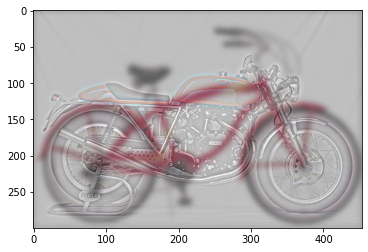

In [42]:
path1 = 'data/ex01/bicycle.bmp'
path2 = 'data/ex01/motorcycle.bmp'
dest = 'destination/ex01.png'
sigma1 = 15
sigma2 = 10
kernel_size1 = int(6*sigma1 + 1)
kernel_size2 = int(6*sigma2 + 1)

create_hybrid_image(path1 , path2 , dest , kernel_size1 , kernel_size2 , sigma1 , sigma2)

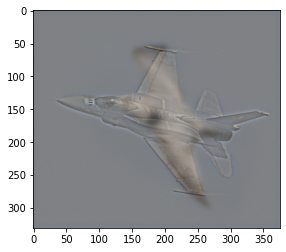

In [44]:
path1 = 'data/ex02/bird.bmp'
path2 = 'data/ex02/plane.bmp'
dest = 'destination/ex02.png'
sigma1 = 15
sigma2 = 10
kernel_size1 = int(6*sigma1 + 1)
kernel_size2 = int(6*sigma2 + 1)

create_hybrid_image(path1 , path2 , dest , kernel_size1 , kernel_size2 , sigma1 , sigma2)

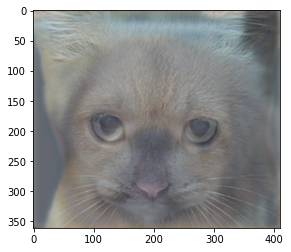

In [45]:
path1 = 'data/ex03/dog.bmp'
path2 = 'data/ex03/cat.bmp'
dest = 'destination/ex03.png'
sigma1 = 20
sigma2 = 30
kernel_size1 = int(6*sigma1 + 1)
kernel_size2 = int(6*sigma2 + 1)

create_hybrid_image(path1 , path2 , dest , kernel_size1 , kernel_size2 , sigma1 , sigma2)

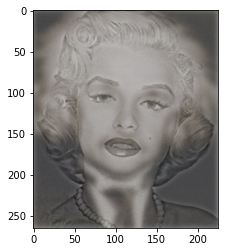

In [46]:
path1 = 'data/ex04/einstein.bmp'
path2 = 'data/ex04/marilyn.bmp'
dest = 'destination/ex04.png'
sigma1 = 10
sigma2 = 10
kernel_size1 = int(6*sigma1 + 1)
kernel_size2 = int(6*sigma2 + 1)

create_hybrid_image(path1 , path2 , dest , kernel_size1 , kernel_size2 , sigma1 , sigma2)

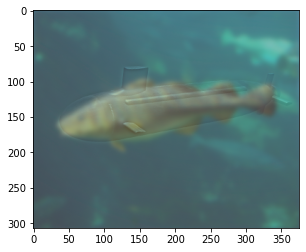

In [47]:
path1 = 'data/ex05/fish.bmp'
path2 = 'data/ex05/submarine.bmp'
dest = 'destination/ex05.png'
sigma1 = 10
sigma2 = 10
kernel_size1 = int(6*sigma1 + 1)
kernel_size2 = int(6*sigma2 + 1)

create_hybrid_image(path1 , path2 , dest , kernel_size1 , kernel_size2 , sigma1 , sigma2)

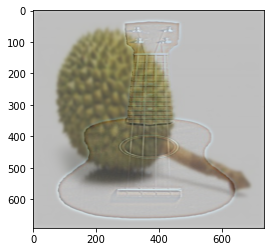

In [49]:
path1 = 'data/ex06/durian.jpg'
path2 = 'data/ex06/ukulele.jpg'
dest = 'destination/ex06.png'
sigma1 = 18
sigma2 = 27
kernel_size1 = int(6*sigma1 + 1)
kernel_size2 = int(6*sigma2 + 1)

create_hybrid_image(path1 , path2 , dest , kernel_size1 , kernel_size2 , sigma1 , sigma2)

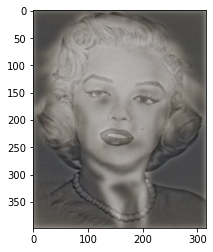

In [51]:
path1 = 'data/ex07/einstein.jpg'
path2 = 'data/ex07/marilyn.jpg'
dest = 'destination/ex07.png'
sigma1 = 19
sigma2 = 28
kernel_size1 = int(6*sigma1 + 1)
kernel_size2 = int(6*sigma2 + 1)

create_hybrid_image(path1 , path2 , dest , kernel_size1 , kernel_size2 , sigma1 , sigma2)